In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df
# df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df = df.drop('CUST_ID',axis=1)
df.fillna(method='bfill')
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

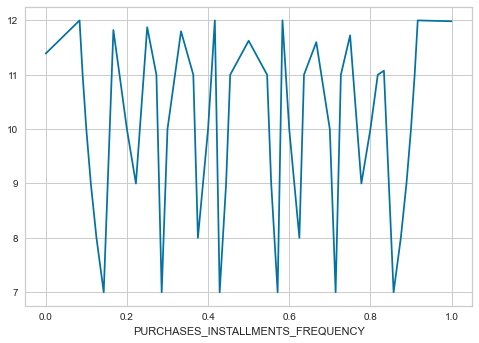

In [5]:
get_details = lambda x: df.groupby(x).mean()['TENURE']
get_details('PURCHASES_INSTALLMENTS_FREQUENCY').plot()

##### before beginign our model we should figure out outliers
##### here there is an example of how to find outliers

In [6]:
for i in df.columns:
    max_quantile = df[i].quantile(0.95)
    min_quantile = df[i].quantile(0.05)
    df_no_outlier = df[(df[i]<max_quantile) & (df[i]>min_quantile)].shape
    print(" outlier in ",i,"is", int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100))
    percentage = int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100)
    

 outlier in  BALANCE is 10
 outlier in  BALANCE_FREQUENCY is 75
 outlier in  PURCHASES is 27
 outlier in  ONEOFF_PURCHASES is 53
 outlier in  INSTALLMENTS_PURCHASES is 48
 outlier in  CASH_ADVANCE is 56
 outlier in  PURCHASES_FREQUENCY is 47
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58
 outlier in  CASH_ADVANCE_FREQUENCY is 57
 outlier in  CASH_ADVANCE_TRX is 56
 outlier in  PURCHASES_TRX is 27
 outlier in  CREDIT_LIMIT is 14
 outlier in  PAYMENTS is 10
 outlier in  MINIMUM_PAYMENTS is 13
 outlier in  PRC_FULL_PAYMENT is 71
 outlier in  TENURE is 91


In [7]:
max_threshold_BALANCE=df["BALANCE"].quantile(0.95)
min_threshold_BALANCE=df["BALANCE"].quantile(0.05)
max_threshold_CREDIT_LIMIT=df["CREDIT_LIMIT"].quantile(0.95)
min_threshold_CREDIT_LIMIT=df["CREDIT_LIMIT"].quantile(0.05)
max_threshold_PAYMENTS=df["PAYMENTS"].quantile(0.95)
min_threshold_PAYMENTS=df["PAYMENTS"].quantile(0.05)
df_no_outlier=df[(df["CREDIT_LIMIT"] < max_threshold_CREDIT_LIMIT) & (df["CREDIT_LIMIT"] > min_threshold_CREDIT_LIMIT) & (df["BALANCE"] < max_threshold_BALANCE) & (df["BALANCE"] > min_threshold_BALANCE) &  (df["PAYMENTS"] < max_threshold_PAYMENTS) & (df["PAYMENTS"] > min_threshold_PAYMENTS)]

In [8]:
df_no_outlier

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.000000,0,24,1200.0,669.039640,336.880119,0.500000,6
8926,53.097361,0.833333,580.00,0.00,580.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,641.303466,52.453011,0.666667,6
8931,46.814144,0.833333,235.80,0.00,235.80,0.000000,0.833333,0.000000,0.666667,0.000000,0,6,1500.0,189.090274,89.496604,0.666667,6
8934,20.260716,0.833333,110.50,0.00,110.50,0.000000,0.666667,0.000000,0.500000,0.000000,0,4,1500.0,161.476789,65.936751,0.500000,6


In [9]:
df_no_outlier.isnull().sum()
df_no_outlier = df.fillna(method='bfill')

In [10]:
normalized_df = pd.DataFrame(normalize(df_no_outlier),columns= df_no_outlier.columns)
normalized_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
3,0.208948,0.000080,0.187928,0.187928,0.000000,0.025799,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.940265,0.000000,0.030689,0.000000,0.001504
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306
8946,0.017067,0.000890,0.266908,0.000000,0.266908,0.000000,0.000890,0.000000,0.000741,0.000000,0.000000,0.005338,0.889694,0.245432,0.073327,0.000000,0.005338
8947,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840
8948,0.026524,0.001642,0.000000,0.000000,0.000000,0.072055,0.000000,0.000000,0.000000,0.000328,0.003942,0.000000,0.985466,0.103572,0.109891,0.000493,0.011826


## Corrolation

Text(0.5, 1.0, 'Cororlation Heat map')

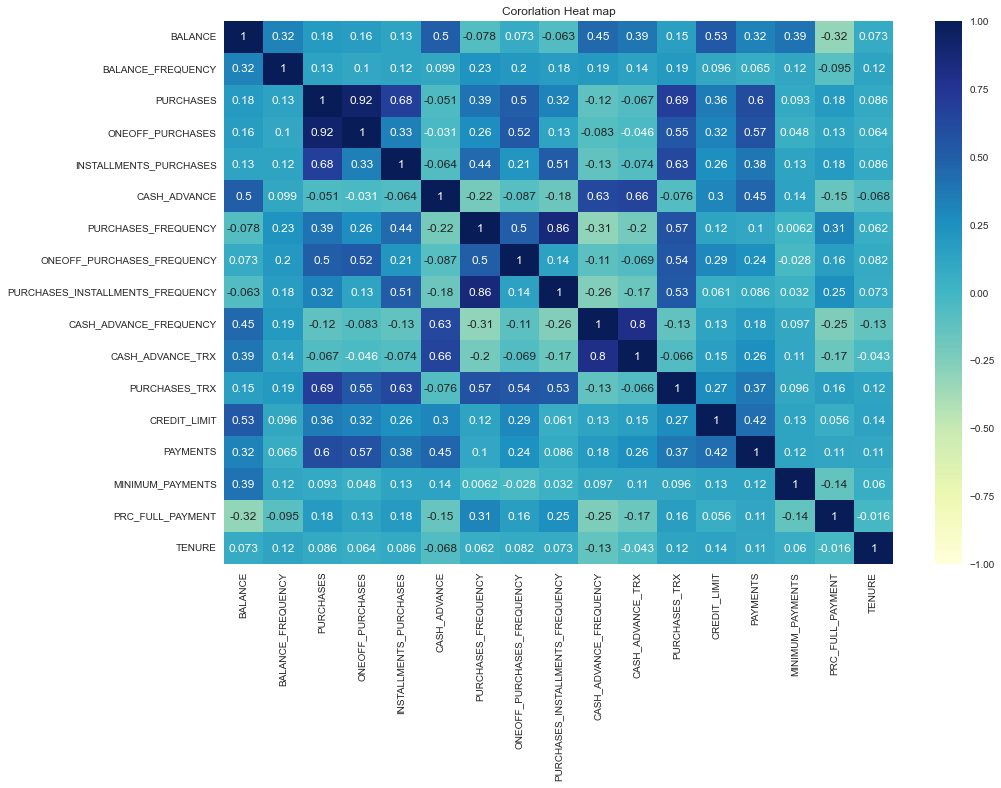

In [11]:
df_corr = df_no_outlier.corr()
import seaborn as sns
better_heatmat = plt.figure(figsize=(15,10))
sns.heatmap(df_corr, vmin= -1 , vmax =1 , annot = True, cmap= "YlGnBu").set_title("Cororlation Heat map")

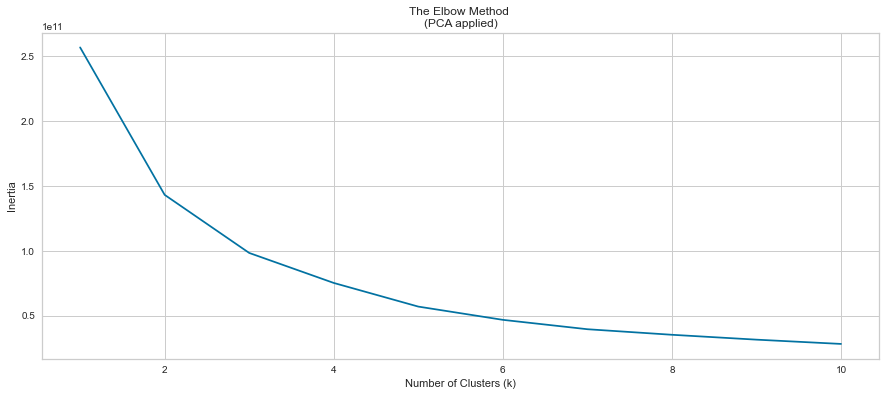

In [12]:
pca = PCA(n_components=2)
pca = pca.fit_transform(df_no_outlier)
pca = pd.DataFrame(pca)
pca.columns =['X','Y']

inertia = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method \n(PCA applied)')
plt.show()

In [13]:
pca

,X,Y
0,-4326.931729,920.096972
1,4118.271545,-2428.715331
2,1497.412777,-1986.572269
3,1311.525946,-1355.755740
4,-3743.836593,754.696217
...,...,...
8945,-4209.027993,1121.523526
8946,-4228.173464,1099.801110
8947,-4380.038185,910.530227
8948,-4791.697564,1030.408557


## K-Mean

- finding the best number of clustring by KElbowVisualizer

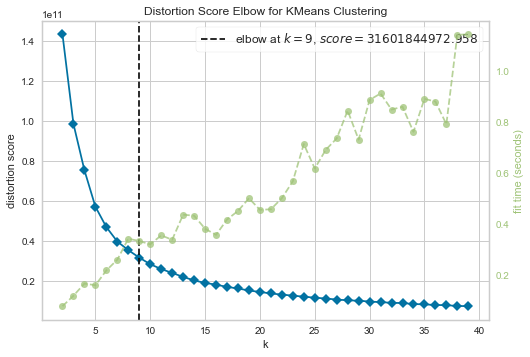

In [16]:
from yellowbrick.cluster import KElbowVisualizer

def K_number(model,data,silhouette_visualizer = True):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,40), timings= True)
    visualizer.fit(data)       
    visualizer.show() 
kmeans = KMeans()
K_number(kmeans,pca)

In [17]:
def evaluate(model,data,silhouette_visualizer = False):
    if silhouette_visualizer:
        visualizer = SilhouetteVisualizer(model,k=(2,40),timings=True)
        visualizer.fit(data)
        visualizer.show()   
    y = model.fit_predict(data)
    
    print("Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(data, y))))
    print("Davies Bouldin Score"+" : "+str("{:.2f}".format(davies_bouldin_score(data, y))))

In [43]:
for i in range(2,12):
  kmeans = KMeans(n_clusters=i, random_state=42)
  print("Number of Clusters : " + str(i))
  evaluate(kmeans, pca)
  print("====================")

Number of Clusters : 2
Silhouette Score : 0.60
Davies Bouldin Score : 0.84
Number of Clusters : 3
Silhouette Score : 0.57
Davies Bouldin Score : 0.78
Number of Clusters : 4
Silhouette Score : 0.51
Davies Bouldin Score : 0.86
Number of Clusters : 5
Silhouette Score : 0.50
Davies Bouldin Score : 0.78
Number of Clusters : 6
Silhouette Score : 0.51
Davies Bouldin Score : 0.76
Number of Clusters : 7
Silhouette Score : 0.44
Davies Bouldin Score : 0.77
Number of Clusters : 8
Silhouette Score : 0.45
Davies Bouldin Score : 0.80
Number of Clusters : 9
Silhouette Score : 0.41
Davies Bouldin Score : 0.82
Number of Clusters : 10
Silhouette Score : 0.41
Davies Bouldin Score : 0.79
Number of Clusters : 11
Silhouette Score : 0.43
Davies Bouldin Score : 0.80


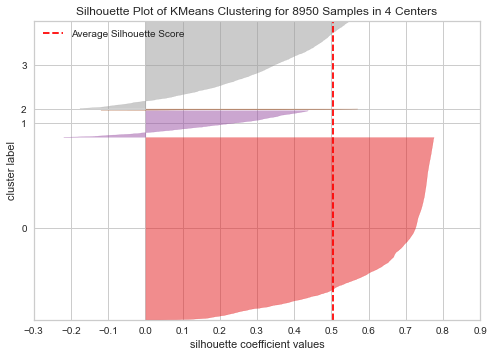

Silhouette Score : 0.51
Davies Bouldin Score : 0.86


In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)
evaluate(kmeans, pca, silhouette_visualizer=True)

## Gaussian Mixture

In [20]:
for i in range(2,11):
  gmm = GaussianMixture(n_components=i, random_state=42)
  print("Number of Components : " + str(i))
  evaluate(gmm, pca)
  print("====================")

Number of Components : 2
Silhouette Score : 0.52
Davies Bouldin Score : 0.99
Number of Components : 3
Silhouette Score : 0.37
Davies Bouldin Score : 1.06
Number of Components : 4
Silhouette Score : 0.33
Davies Bouldin Score : 1.11
Number of Components : 5
Silhouette Score : 0.30
Davies Bouldin Score : 1.26
Number of Components : 6
Silhouette Score : 0.34
Davies Bouldin Score : 1.07
Number of Components : 7
Silhouette Score : 0.24
Davies Bouldin Score : 1.19
Number of Components : 8
Silhouette Score : 0.25
Davies Bouldin Score : 1.05
Number of Components : 9
Silhouette Score : 0.25
Davies Bouldin Score : 1.02
Number of Components : 10
Silhouette Score : 0.25
Davies Bouldin Score : 1.08


## Visualization 

In [38]:
def plot_model_clustering(model, data):
  plt.figure(figsize=(15,7))
  model.fit(data)
  labels= model.labels_
  df_label=data.copy()
  df_label['labels']= labels
  ax = sns.scatterplot(x='X', y='Y', hue='labels', data=df_label, palette='bright')
  for index in range(len(str(model))):
    if str(model)[index] == '(':
      ind = index
  ax.set_title(str(model)[:ind])

  evaluate(model, data)

Silhouette Score : 0.57
Davies Bouldin Score : 0.87


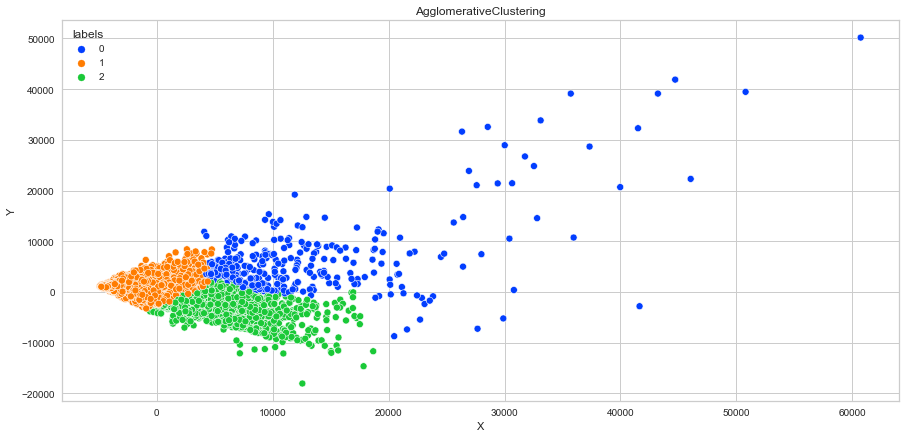

In [32]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage="ward")
plot_model_clustering(hcluster, pca)

Silhouette Score : 0.51
Davies Bouldin Score : 0.86


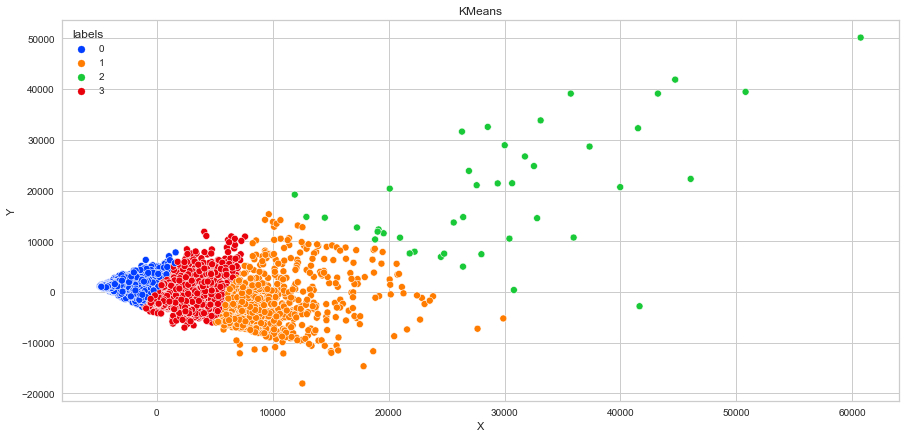

In [23]:
plot_model_clustering(kmeans, pca)